$\textbf{Assignment Lab 7b}$


Name: Vicente Valenzuela Carrasco

In [189]:
import context
from IPython.display import Image
import IPython.display as display
# import plotting package and numerical python package for use in examples later
import matplotlib.pyplot as plt
# make the plots happen inline
%matplotlib inline
# import the numpy array handling library
import numpy as np
# import the 2-dimensional drop solver
from numlabs.lab7 import interactive1
from notebooks.lab7 import interactive_vicente

The code solves the high water level in the center (similar to rain.py)
in two-dimensions with periodic boundary conditions on a flat bottom.
The depth is set in the functions find_depth*. You will use the C-grid and edit the
find_depth3 function as described below.


(a) Choose an interesting but smooth topography (remembering that the domain is periodic in both space dimensions). Implement it in find_depth3 correctly given the grid-C staggering.


(b) Run your new code. Discuss any other changes you make to the code. You may want to change what and when it plots.


(c) Explain the differences that the bottom topography makes.

------------------------------------------------------------------------------------------------------------------------------------------------------------

First, we run the $\textbf{interactive.py}$ code with the recommended settings: $\textbf{grid}$ = 3, $\textbf{ngrid}$ = 11, $\textbf{dt}$ = 150 and $\textbf{T}$ = 4x3600 (4 hours), which is considering a FLAT BOTTOM:

dx/dt 666.667

sqrt(g*H0) 100.000

Flat Bottom


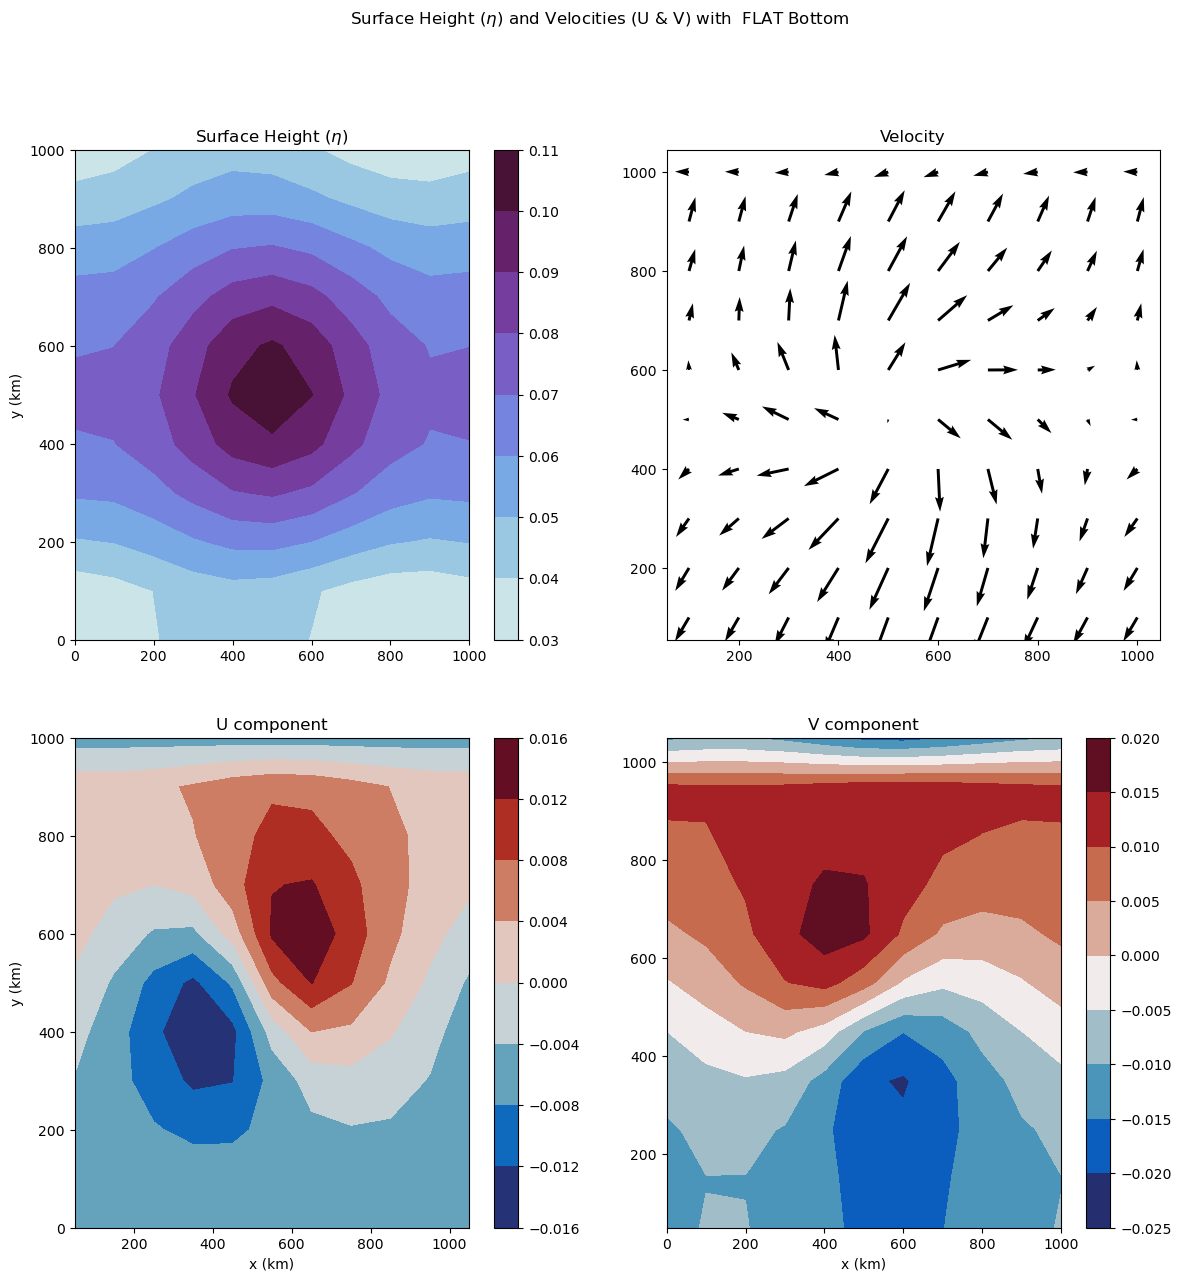

In [190]:
import importlib
importlib.reload(interactive1)
interactive1.interactive1(grid=3, ngrid=11, dt=150, T=4*3600)

For changing the bottom topography I choose to create a Gaussian seamount centred in the grid and starting from the 1000 m (H0) depth with a smooth slope.

The main changes that I made to the code was modifying the find_depth3 function as follows:

In [191]:
def find_depth3(H0, ngrid):
    X = np.arange(1, ngrid)
    Y = np.arange(1, ngrid)
    X, Y = np.meshgrid(X, Y)
    # In this case, the staggered grid is equivalent to move the bump 0.5 and -0.5 for Hv in comparison to Hu, so that Hv[i,j] == Hu[i-0.5,j+0.5]
    R1 = np.sqrt((X-(ngrid)/2)**2 + (Y-(ngrid)/2)**2)# Centred Gaussian bump for the Hu grid
    R2 = np.sqrt((X+0.5-(ngrid)/2)**2 + (Y-0.5-(ngrid)/2)**2)# Centred (+- 0.5) Gaussian bump for the Hv grid

    std_dev = 15.0  # Value to smooth the bottom
    #
    H1 = (H0*300)*((1. / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (R1 / std_dev)**2))
    H2 = (H0*300)*((1. / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (R2 / std_dev)**2))
    #
    mean_bump_H1 = np.mean(H1)
    mean_bump_H2 = np.mean(H2)

    # Create a condition to make all the boundaries equal (at the same depth)
    H1[H1 < mean_bump_H1] = mean_bump_H1 
    H2[H2 < mean_bump_H2] = mean_bump_H2
    # Set the gaussian bump to start from 0 m
    Hu=H1-mean_bump_H1
    Hv=H2-mean_bump_H2
    #
    fig = plt.figure(figsize=(14, 7))
    #
    ax = plt.subplot2grid((1, 2), (0, 0), projection='3d')
    surf = ax.plot_surface(X, Y, Hu, cmap=cm.deep_r, linewidth=0, antialiased=False)
    ax.set_xlabel('ngrid (X)')
    ax.set_ylabel('ngrid (Y)')
    ax.set_zlabel('Height [m]')
    #
    ax1 = plt.subplot2grid((1, 2), (0, 1))
    contour = ax1.contourf(X, Y, Hu, cmap=cm.deep_r)
    cbar = plt.colorbar(contour, ax=ax1)
    cbar.set_label('Bottom Height [m]')
    ax1.set_xlabel('ngrid (X)')
    ax1.set_ylabel('ngrid (Y)')
    #
    plt.suptitle('Gaussian Seamount with a maximum bottom height of ' + str(np.max(np.round(Hu, 2))) + ' m', fontsize=20)
    plt.tight_layout()
    #
    plt.show()
    return Hu, Hv

Here I modified the $\textbf{Hu}$ and $\textbf{Hv}$ variables to create a gaussian bump, which is first configurated to have a base equal to the mean of Hu and Hv, so in this way we make sure that we have a flat surface where the seamount starts to grow. Also, it's conditionated to start from 1000 m depth (H0) and to reach a height in dependency of the number of gridpoints and the selected H0.


Plots are created in this process to show the Gaussian seamount structure and its maximum height. Also, new plots for the surface height and velocity components are shown at the end of the modified $\textbf{interactive.py}$ function with a better display for further comparisons.

Some changes are also made in the periodic boundary conditions for $\textbf{Hu}$ and $\textbf{Hv}$, which are made in the same way as for the other variables:

In [192]:
def periodicbc(ngrid, u, v, eta, Hu, Hv):
    '''do periodic boundary conditions'''
    eta[0, :] = eta[-2, :]
    eta[-1, :] = eta[1, :]
    eta[:, 0] = eta[:, -1]
    eta[:, -1] = eta[:, 1]

    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -1]
    u[:, -1] = u[:, 1]

    v[0, :] = v[-2, :]
    v[-1, :] = v[1, :]
    v[:, 0] = v[:, -1]
    v[:, -1] = v[:, 1]
    # Periodic conditions for Hu and Hv
    Hu[0, :] = Hu[-2, :]
    Hu[-1, :] = Hu[1, :]
    Hu[:, 0] = Hu[:, -1]
    Hu[:, -1] = Hu[:, 1]
    #
    Hv[0, :] = Hv[-2, :]
    Hv[-1, :] = Hv[1, :]
    Hv[:, 0] = Hv[:, -1]
    Hv[:, -1] = Hv[:, 1]        

    return u, v, eta, Hu, Hv

All of these modifications are written in the new modified function called $\textbf{interactive-vicente.py}$, which is used in the next line of code with the same default settings as before, using a C-grid but a different topography:

C:\Users\vicen\repos_511\numeric_2024\notebooks\lab7\interactive_vicente.py:257: SyntaxWarning: invalid escape sequence '\e'
  ax[0,0].set_title('Surface Height ($\eta$)')


dx/dt 666.667

sqrt(g*H0) 100.000



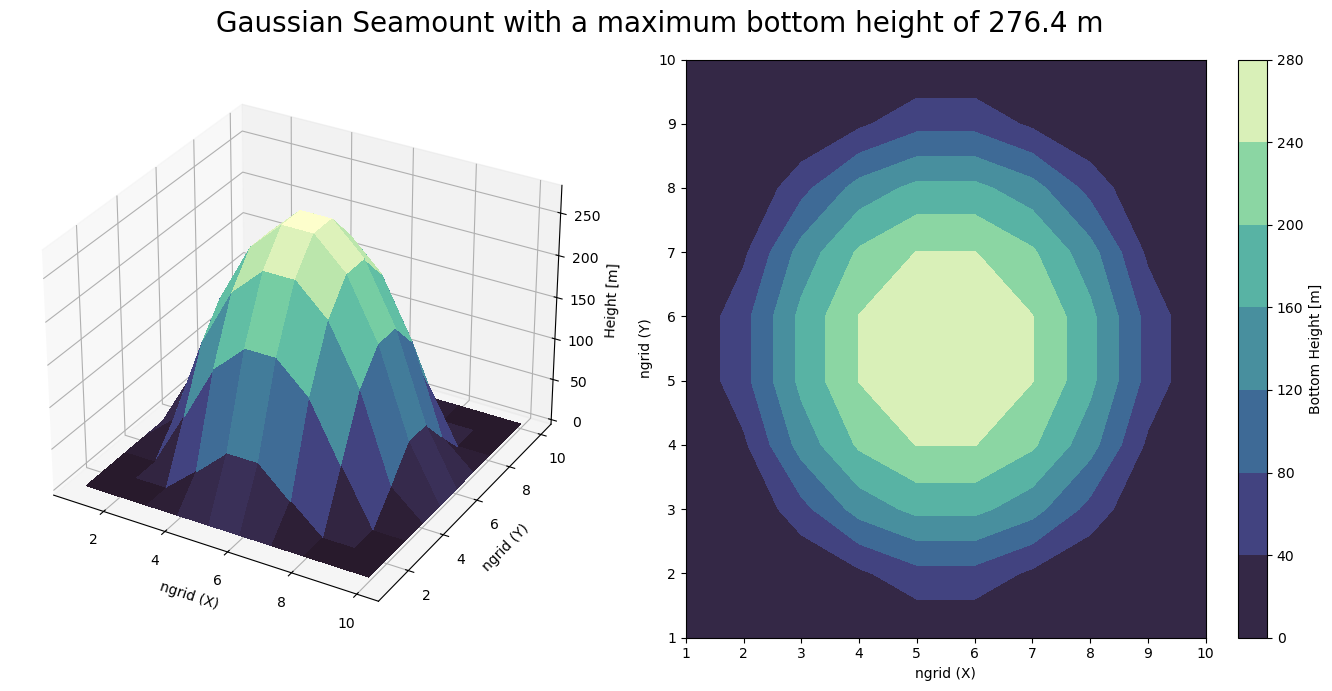

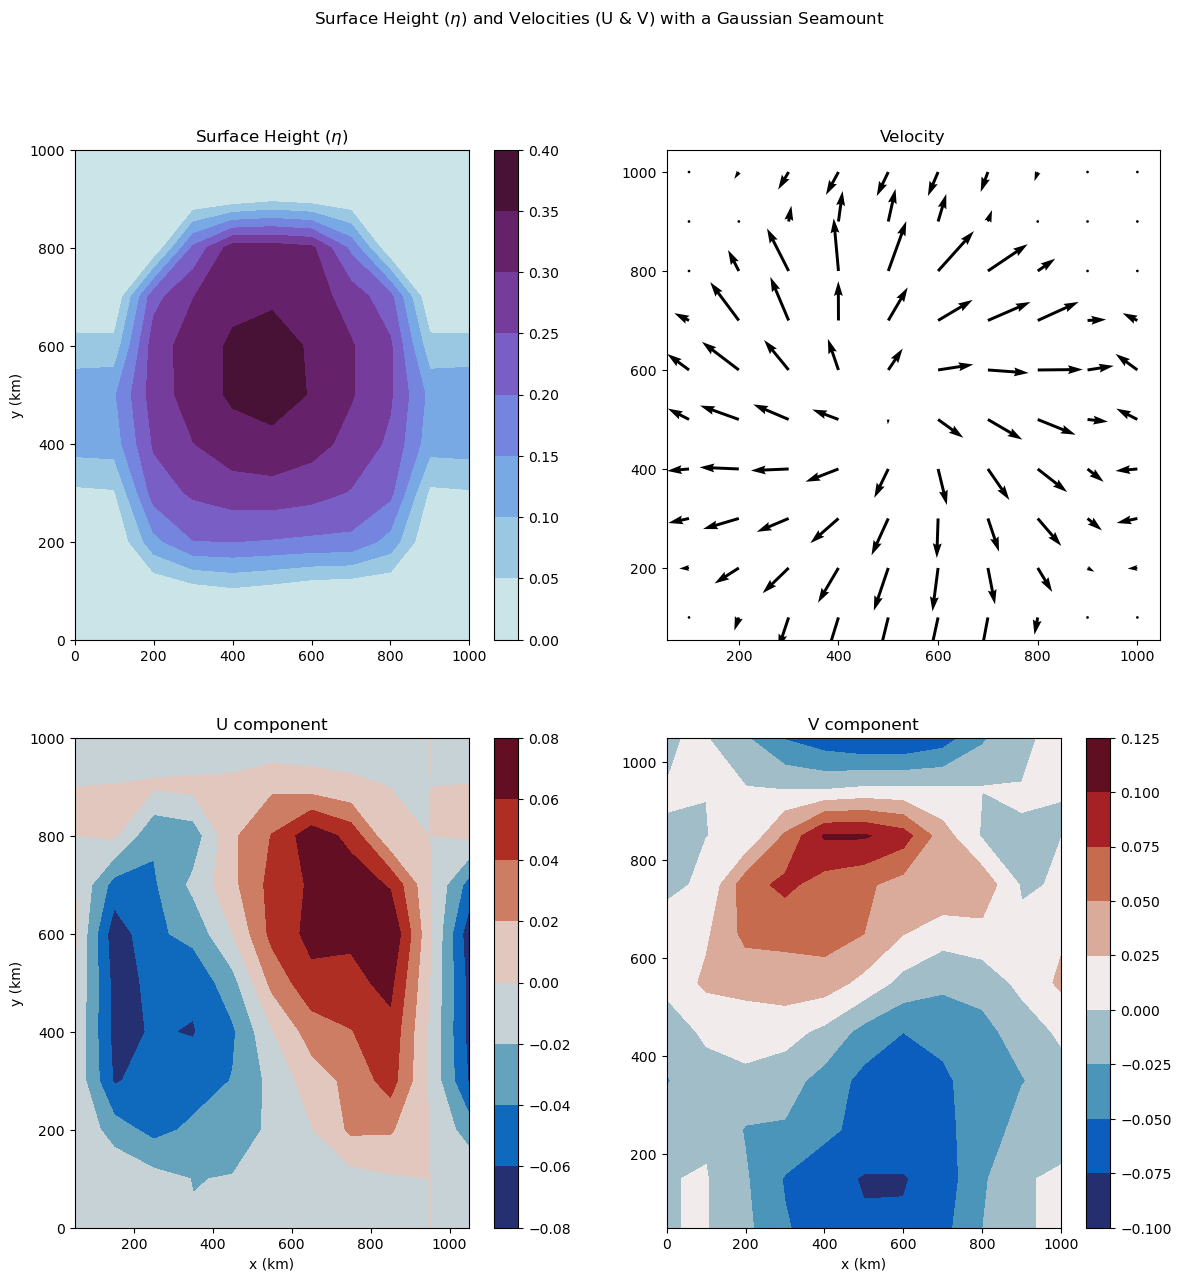

In [193]:
importlib.reload(interactive_vicente)
interactive_vicente.interactive1(grid=3, ngrid=11, dt=150, T=4*3600)

By comparing the results from a flat bottom configuration with the ones with the new gaussian seamount configuration, we can see some clear and interesting differences.

First, we can see that both surface height ($\eta$) and the velocity curl seem to be more constrained to the center of the basin. Big differences in the surface height are shown in comparison to the flat bottom scenario, describing a bigger and steeper bump in the middle. Also, bigger and opposite velocity magnitudes are shown by the arrows near the northern and western boundaries, with a more constrained curl in the middle where the surface height is higher.

Now, if we look at both velocity components (U and V), we can see that the main general distribution is conserved, considering the rotation shown by the curl. But, an interesting feature is that the magnitudes are higher than in the flat bottom scenario for positive and negative values of both components, describing a more intense rotation around the seamount.

Same as before, the periodic boundary conditions are defined to maintain same values for both initial and final grid points in surface height, velocity and bottom height, which should be the reason why we have different north-south and east-west boundaries in comparison to the flat bottom scenario, but with excepted values between them in relation to our new results in the seamount bottom scenario.



$\textbf{Does this make sense?}$


Previous studies have found that topographic obstacles can led to the creation of antyciclonic eddies above them (McCartney (1976)). In our case, by adding a seamount structure with a height of approximatelly 300 m, the creation of these structures (which are called Taylor Columns) can enhance the anticyclonic rotation previously described in the flat bottom scenario, which would explain the higher magnitudes in both velocity components with the same clock-wise circulation patttern, and therefore, explaining the bigger surface height ($\eta$) that we see in the plots. 

Reference:

McCartney, M. S. (1976), The interaction of zonal currents with topography with applications to the Southern Ocean, Deep Sea Res. Oceanogr. Abstr., 23, 413–427.

Appendix: $\textbf{interactive-vicente.py}$

In [194]:
#!/usr/bin/env python
"""Interactive One.  Initialize a Gaussian bump in surface height and allow it evolve.  Note that under
rotational dynamics, the final steady state would be flow around the bump. If you chose the smaller domain size
even though the Coriolis force is still included, the scale is so small, its effect is negligible"""

import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cm

def interactive1(grid, ngrid, dt, T, small=False):  # return eta
    '''recommended values ngrid=11, dt=150, T=4*3600 (4 hours), small=False OR
    ngrid=11, dt=4, T=90, small=True
    '''

    stepper = {1: stepgrid1, 2: stepgrid2, 3: stepgrid3}
    find_depth = {1: find_depth1, 2: find_depth2, 3: find_depth3}

# define rotation speed, gravity and depth
    f = 1e-4
    g = 10
    H0 = 1000
# set up spatial scale L is total domain size
    L = 1000e3

# make the domain depth and width smaller if small is True
    if small:
        H0 = 10
        L = 1000

    dx = L/(ngrid-1)

# write out dx/dt and sqrt(g*H) for comparison
    print('dx/dt {0:.3f}\n'.format(dx/dt))
    print('sqrt(g*H0) {0:.3f}\n'.format(np.sqrt(g*H0)))
    rdx = 1./dx

# set up Gaussian for forcing (its a bump in the center of the domain)
    x, y, spatial = findforcing(L, dx, ngrid)

# set up temporal scale T is total run time
    ntime = int(T/dt)

# initialize
    u, v, eta, up, vp, etap = initial(ngrid)

# set-up topography
    Hu, Hv = find_depth[grid](H0, ngrid)

    # main loop (leap-frog)
    for k in range(ntime):
        u, v, eta = stepper[grid](ngrid, f, g, Hu, Hv, dt, rdx, u, v, eta, up, vp, etap)

        # add forcing
        t = k * dt / 8640
        eta = eta + 0.1 * (1 - np.exp(-t*t)) * spatial

        # periodic boundary conditions
        u, v, eta, Hu, Hv = periodicbc(ngrid, u, v, eta, Hu, Hv)

        # exchange values
        u, v, eta, up, vp, etap = exchange(u, v, eta, up, vp, etap)

    # plot contours
    plotit(grid, ngrid, dx, x, y, u, v, eta, H0)

    return

def findforcing(L, dx, ngrid):
    '''define a two dimensional Gaussian of forcing with half-width L'''
    x = np.arange(0, L + 0.1*dx, dx)
    y = x  # symmetrical case
    spatial = np.zeros((ngrid, ngrid))

    for i in range(ngrid):
        for j in range(ngrid):
            spatial[i,j] = np.exp(-((y[j] - L/2.) * (y[j] - L/2)
                                    +(x[i] - L/2.) * (x[i] - L/2))
                                    /(L*L / 48.))
    return x, y, spatial

def find_depth1(H0, ngrid):
    print ('Flat Bottom (Find Depth 1)')
    Hu = H0*np.ones((ngrid, ngrid))
    Hv = H0*np.ones_like(Hu)
    return Hu, Hv

def find_depth2(H0, ngrid):
    print ('Flat Bottom (Find Depth 2)')
    Hu = H0*np.ones((ngrid, ngrid))
    Hv = H0*np.ones_like(Hu)
    return Hu, Hv

def find_depth3(H0, ngrid):
    X = np.arange(1, ngrid)
    Y = np.arange(1, ngrid)
    X, Y = np.meshgrid(X, Y)
    # Is in this case the staggered grid equivalent to move the bump -0.5 and +0.5 for Hv in comparison to Hu, so that Hv[i,j] == Hu[i-0.5,j+0.5]
    R1 = np.sqrt((X-(ngrid)/2)**2 + (Y-(ngrid)/2)**2)# Centred Gaussian bump for the Hu grid
    R2 = np.sqrt((X+0.5-(ngrid)/2)**2 + (Y-0.5-(ngrid)/2)**2)# Centred (+- 0.5) Gaussian bump for the Hv grid

    std_dev = 15.0  # Value to smooth the bottom
    #
    H1 = (H0*300)*((1. / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (R1 / std_dev)**2))
    H2 = (H0*300)*((1. / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (R2 / std_dev)**2))
    #
    mean_bump_H1 = np.mean(H1)
    mean_bump_H2 = np.mean(H2)

    # Create a condition to make all the boundaries equal (at the same depth)
    H1[H1 < mean_bump_H1] = mean_bump_H1 
    H2[H2 < mean_bump_H2] = mean_bump_H2
    # Set the gaussian bump to start from 0 m
    Hu=H1-mean_bump_H1
    Hv=H2-mean_bump_H2
    #
    fig = plt.figure(figsize=(14, 7))
    #
    ax = plt.subplot2grid((1, 2), (0, 0), projection='3d')
    surf = ax.plot_surface(X, Y, Hu, cmap=cm.deep_r, linewidth=0, antialiased=False)
    ax.set_xlabel('ngrid (X)')
    ax.set_ylabel('ngrid (Y)')
    ax.set_zlabel('Height [m]')
    #
    ax1 = plt.subplot2grid((1, 2), (0, 1))
    contour = ax1.contourf(X, Y, Hu, cmap=cm.deep_r)
    cbar = plt.colorbar(contour, ax=ax1)
    cbar.set_label('Bottom Height [m]')
    ax1.set_xlabel('ngrid (X)')
    ax1.set_ylabel('ngrid (Y)')
    #
    plt.suptitle('Gaussian Seamount with a maximum bottom height of ' + str(np.max(np.round(Hu, 2))) + ' m', fontsize=20)
    plt.tight_layout()
    #
    plt.show()
    return Hu, Hv

def initial(ngrid):
    '''initialize a ngrid x ngrid domain, u, v, and eta, all zero'''

    u = np.zeros((ngrid, ngrid))
    v = np.zeros_like(u)
    eta = np.zeros_like(u)

    up = np.zeros_like(u)
    vp = np.zeros_like(u)
    etap = np.zeros_like(u)

    return u, v, eta, up, vp, etap

def stepgrid1(ngrid, f, g, Hu, Hv, dt, rdx, u, v, eta, up, vp, etap):
    '''take a step forward using grid 1 (A)'''
    n = ngrid
    nm1 = ngrid-1
    nm2 = ngrid-2
    u[1:nm1, 1:nm1] = u[1:nm1, 1:nm1] + 2*dt * (f * vp[1:nm1, 1:nm1]
                                                - g * (etap[2:n, 1:nm1] - etap[0:nm2, 1:nm1]) * 0.5 * rdx)
    v[1:nm1, 1:nm1] = v[1:nm1, 1:nm1] + 2*dt * (-f * up[1:nm1, 1:nm1]
                                                - g *(etap[1:nm1,2:n] - etap[1:nm1, 0:nm2]) * 0.5 * rdx)
    eta[1:nm1, 1:nm1] = eta[1:nm1, 1:nm1] + 2*dt * (-(Hu[2:n, 1:nm1] * up[2:n, 1:nm1]
                                                      - Hu[0:nm2, 1:nm1] * up[0:nm2, 1:nm1]) * 0.5 * rdx
                                                    -(Hv[1:nm1, 2:n] * vp[1:nm1, 2:n]
                                                      - Hv[1:nm1, 0:nm2] * vp[1:nm1, 0:nm2]) * 0.5 * rdx)
    return u, v, eta

def stepgrid2(ngrid, f, g, Hu, Hv, dt, rdx, u, v, eta, up, vp, etap):
    '''take a step forward using grid 2 (B)'''
    n = ngrid
    nm1 = ngrid-1
    nm2 = ngrid-2
    u[1:nm1, 1:nm1] = u[1:nm1, 1:nm1] + 2*dt * (f * vp[1:nm1, 1:nm1]
                                                 -g * (etap[2:n, 1:nm1] - etap[1:nm1, 1:nm1]
                                                        + etap[2:n, 2:n] - etap[1:nm1, 2:n]) * 0.5 * rdx)
    v[1:nm1, 1:nm1] = v[1:nm1, 1:nm1] + 2*dt * (-f*up[1:nm1, 1:nm1]
                                                 - g * (etap[1:nm1, 2:n] - etap[1:nm1, 1:nm1]
                                                      + etap[2:n, 2:n] - etap[2:n, 1:nm1]) * 0.5 * rdx)
    eta[1:nm1, 1:nm1] = eta[1:nm1, 1:nm1] + 2*dt * (-(Hu[1:nm1, 1:nm1] * up[1:nm1, 1:nm1]
                                                      - Hu[0:nm2, 1:nm1] * up[0:nm2, 1:nm1]
                                                         + Hu[1:nm1, 0:nm2] * up[1:nm1, 0:nm2]
                                                         - Hu[0:nm2, 0:nm2] * up[0:nm2, 0:nm2]
                                                         + Hv[1:nm1, 1:nm1] * vp[1:nm1, 1:nm1]
                                                         - Hv[1:nm1, 0:nm2] * vp[1:nm1, 0:nm2]
                                                         + Hv[0:nm2, 1:nm1] * vp[0:nm2, 1:nm1]
                                                         - Hv[0:nm2, 0:nm2] * vp[0:nm2, 0:nm2]) * 0.5 * rdx)
    return u, v, eta

def stepgrid3(ngrid, f, g, Hu, Hv, dt, rdx, u, v, eta, up, vp, etap):
    '''take a step forward using grid 3 (C)'''
    n = ngrid
    nm1 = ngrid-1
    nm2 = ngrid-2
    vmid = np.zeros_like(u); umid = np.zeros_like(u)
    vmid[1:nm1, 1:nm1] = (vp[1:nm1, 1:nm1] + vp[2:n, 1:nm1] + vp[1:nm1, 0:nm2] + vp[2:n, 0:nm2]) * 0.25
    umid[1:nm1, 1:nm1] = (up[1:nm1, 1:nm1] + up[1:nm1, 2:n] + up[0:nm2, 1:nm1] + up[0:nm2, 2:n]) * 0.25
    u[1:nm1, 1:nm1] = u[1:nm1, 1:nm1] + 2*dt * (f * vmid[1:nm1, 1:nm1]
                                                - g * (etap[2:n, 1:nm1] - etap[1:nm1, 1:nm1]) * rdx)
    v[1:nm1, 1:nm1] = v[1:nm1, 1:nm1] + 2*dt * (-f * umid[1:nm1, 1:nm1]
                                                - g *(etap[1:nm1, 2:n] - etap[1:nm1, 1:nm1]) * rdx)
    eta[1:nm1, 1:nm1] = eta[1:nm1, 1:nm1] + 2*dt * (-(Hu[1:nm1, 1:nm1] * up[1:nm1, 1:nm1]
                                                      - Hu[0:nm2, 1:nm1] * up[0:nm2, 1:nm1]) * rdx
                                                    -(Hv[1:nm1, 1:nm1] * vp[1:nm1, 1:nm1]
                                                      - Hv[1:nm1, 0:nm2] * vp[1:nm1, 0:nm2])* rdx)
    return u, v, eta

def periodicbc(ngrid, u, v, eta, Hu, Hv):
    '''do periodic boundary conditions'''
    eta[0, :] = eta[-2, :]
    eta[-1, :] = eta[1, :]
    eta[:, 0] = eta[:, -1]
    eta[:, -1] = eta[:, 1]

    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -1]
    u[:, -1] = u[:, 1]

    v[0, :] = v[-2, :]
    v[-1, :] = v[1, :]
    v[:, 0] = v[:, -1]
    v[:, -1] = v[:, 1]
    # Periodic conditions for Hu and Hv
    Hu[0, :] = Hu[-2, :]
    Hu[-1, :] = Hu[1, :]
    Hu[:, 0] = Hu[:, -1]
    Hu[:, -1] = Hu[:, 1]
    #
    Hv[0, :] = Hv[-2, :]
    Hv[-1, :] = Hv[1, :]
    Hv[:, 0] = Hv[:, -1]
    Hv[:, -1] = Hv[:, 1]        

    return u, v, eta, Hu, Hv

def exchange(u, v, eta, up, vp, etap):
    '''swap new and old values'''
    store = np.zeros_like(vp)  # make sure store is its own array, not just another name for vp
    store = vp
    vp = v
    v = store
    store = up
    up = u
    u = store
    store = etap
    etap = eta
    eta = store

    return u, v, eta, up, vp, etap

def plotit(grid, ngrid, dx, x, y, u, v, eta, H0):
    '''Contour plots of u, v, eta'''

    shift = {1: (0, 0), 2: (0.5, 0.5), 3: (0.5, 0)}

    fig, ax = plt.subplots(2,2, figsize=(14,14))
    for i in range(2):
        ax[1,i].set_xlabel('x (km)')
        ax[i,0].set_ylabel('y (km)')
    ax[0,0].set_title('Surface Height ($\eta$)')
    ax[0,1].set_title('Velocity')
    ax[1,0].set_title('U component')
    ax[1,1].set_title('V component')
    plot1 = ax[0,0].contourf(x/H0, y/H0, eta.transpose(), cmap=cm.dense)
    plot2 = ax[1,0].contourf((x + shift[grid][0] * dx)/H0,
                  (y + shift[grid][1] * dx)/H0, u.transpose(), cmap=cm.balance)
    plot3 = ax[1,1].contourf((x + shift[grid][1] * dx)/H0,
                  (y + shift[grid][0] * dx)/H0, v.transpose(), cmap=cm.balance)
    cb1=plt.colorbar(plot1, ax=ax[0,0])
    cb1=plt.colorbar(plot2, ax=ax[1,0])
    cb1=plt.colorbar(plot3, ax=ax[1,1])
    if grid == 3:
        ax[0,1].quiver(x[1:]/H0, y[1:]/H0,
                       0.5 * (u[1:,1:] + u[:-1,1:]).transpose(),
                       0.5 * (v[1:,1:] + v[1:,:-1]).transpose())
    else:
        ax[0,1].quiver(x/H0, y/H0, u.transpose(), v.transpose())
    #
    plt.suptitle(r'Surface Height ($\eta$) and Velocities (U & V) with a Gaussian Seamount')  

<>:257: SyntaxWarning: invalid escape sequence '\e'
<>:257: SyntaxWarning: invalid escape sequence '\e'
C:\Users\vicen\AppData\Local\Temp\ipykernel_7604\1137959307.py:257: SyntaxWarning: invalid escape sequence '\e'
  ax[0,0].set_title('Surface Height ($\eta$)')
